In [62]:
# Import libraries 

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [63]:
# Data Cleaning

# In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.Files:
# whale_returns.csv
# algo_returns.csv
# sp500_history.csv

whale_returns_csv = Path("../Resources/whale_returns.csv")
algo_returns_csv = Path("../Resources/algo_returns.csv")
sp500_history_csv = Path("../Resources/sp500_history.csv")


In [64]:
#Whale Returns

#Read the Whale Portfolio daily returns and clean the data

# Reading whale returns

whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [65]:
# Count nulls

print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [66]:
# Drop nulls

whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [67]:
# Algorithmic Returns

# Read the algorithmic daily returns and clean the data

# Reading algorithmic returns

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [68]:
# Count nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [69]:
# Drop nulls

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [70]:
# SP500 returns

# Reading S&P 500 Closing Prices

sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [71]:
# Check Data Types

sp500_history.dtypes

Close    object
dtype: object

In [72]:
# Fix Data Types

sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [73]:
# Calculate Daily Returns

sp500_daily_returns = sp500_history.pct_change()

In [74]:
# Drop nulls

sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [75]:
# Rename Column

sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

In [76]:
# Combine Whale, Algorithmic, and S&P 500 Returns
# Concatenate all DataFrames into a single DataFrame

df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")
df_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


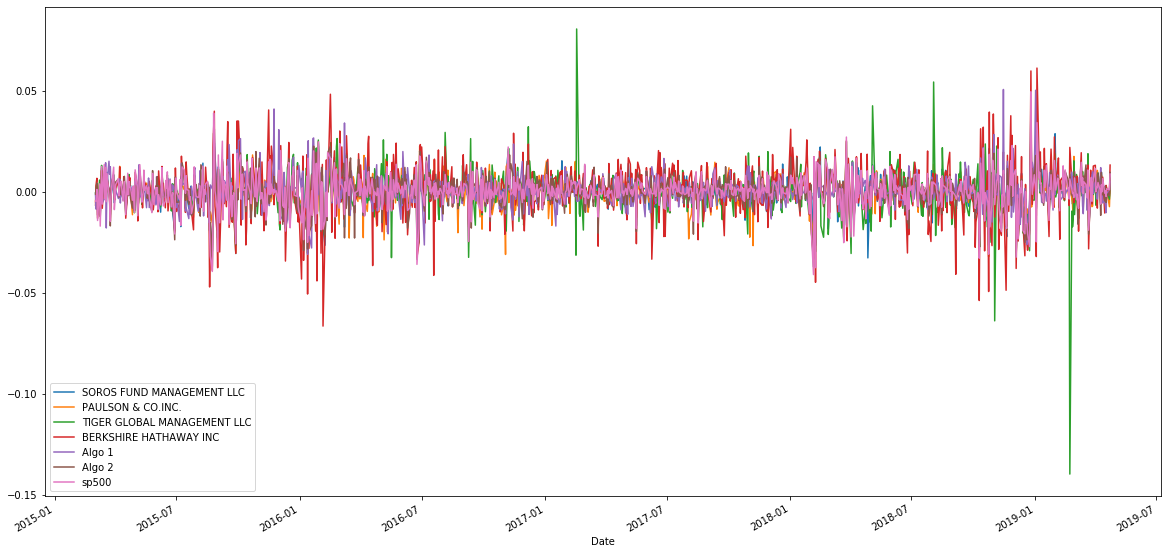

In [77]:
# Portfolio Analysis

#Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500?
# Plot daily returns

df_daily.plot(figsize = (20,10))

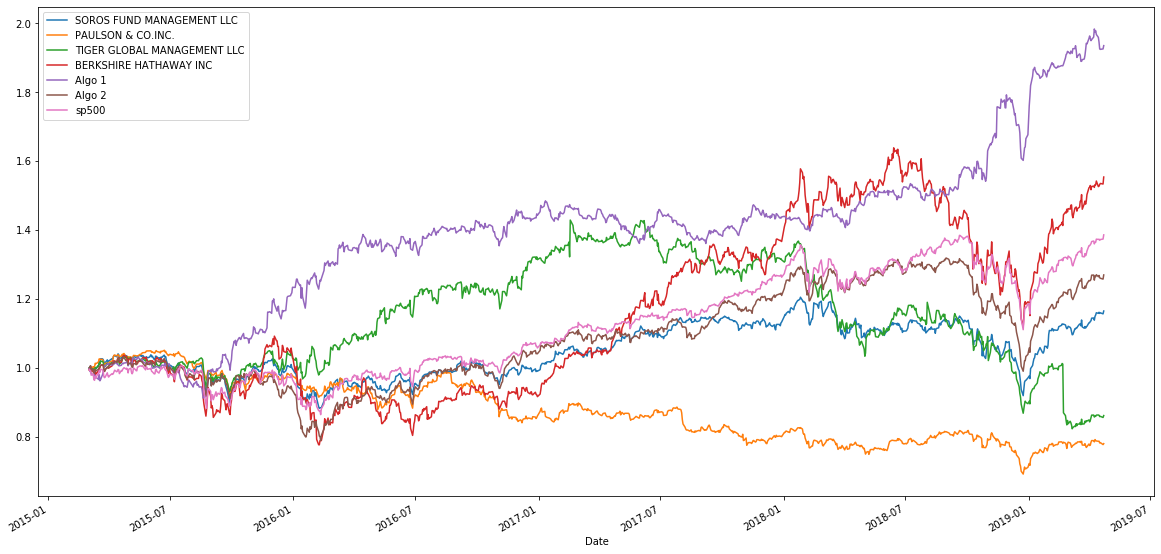

In [78]:
# Plot cumulative returns

df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

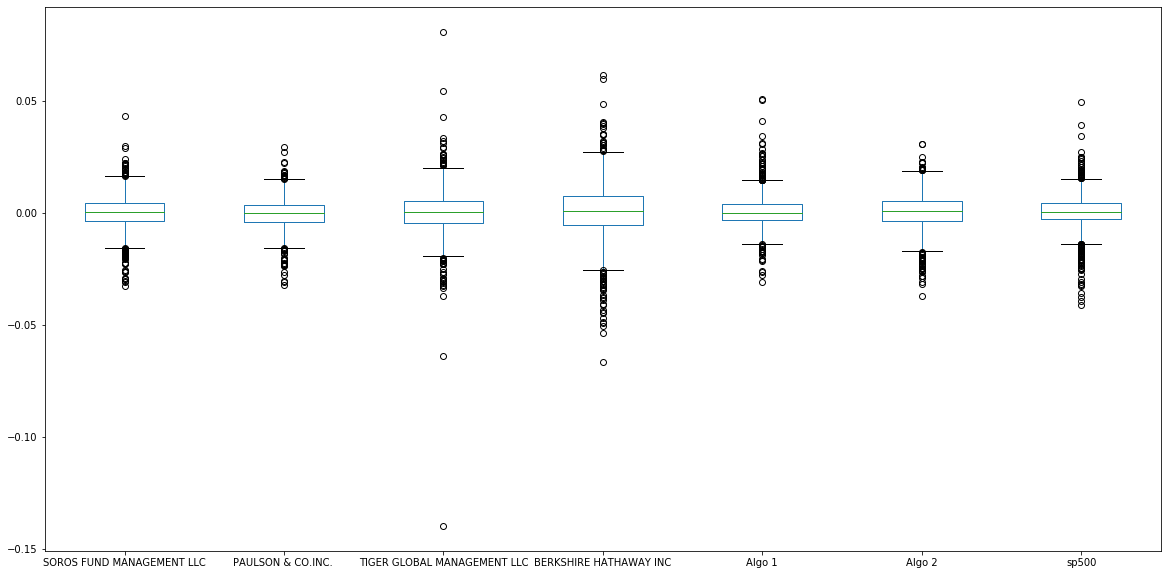

In [79]:
# Risk
# Determine the risk of each portfolio:
# Box plot to visually show risk

df_daily.plot(kind = "box", figsize = (20,10))

In [80]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [81]:
# Determine which portfolios are riskier than the S&P 500

higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [82]:
# Calculate the annualized standard deviation (252 trading days)

df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


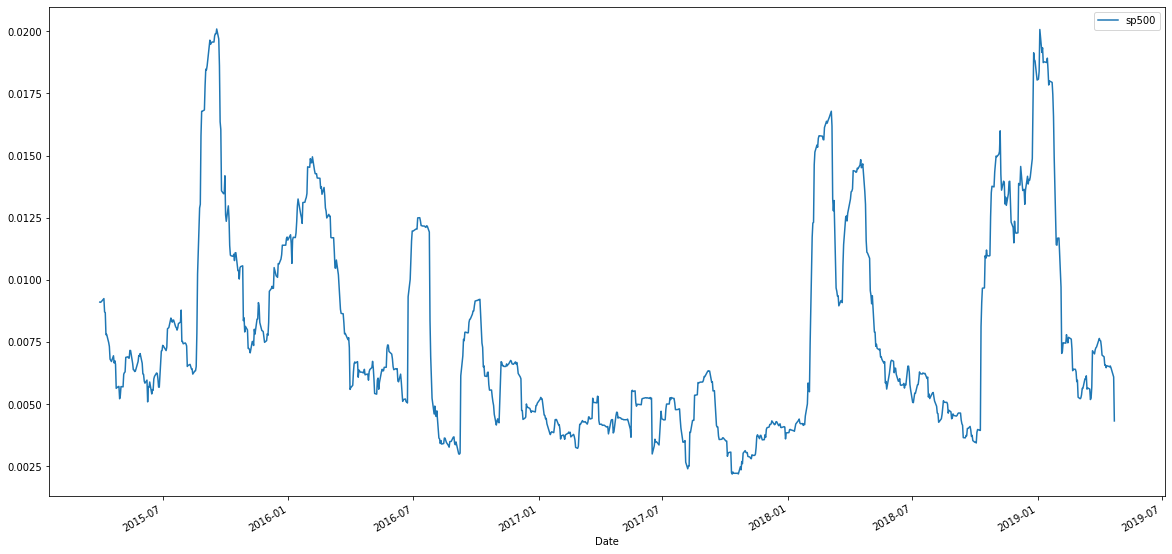

In [83]:
# Rolling Statistics
# Risk changes over time. Analyze the rolling statistics for Risk and Beta. 
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

In [84]:
# Construct a correlation table

correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
correlation_sp500

SOROS FUND MANAGEMENT LLC      0.837864
PAULSON & CO.INC.              0.669732
TIGER GLOBAL MANAGEMENT LLC    0.623946
BERKSHIRE HATHAWAY INC         0.751371
Algo 1                         0.279494
Algo 2                         0.858764
sp500                          1.000000
Name: sp500, dtype: float64

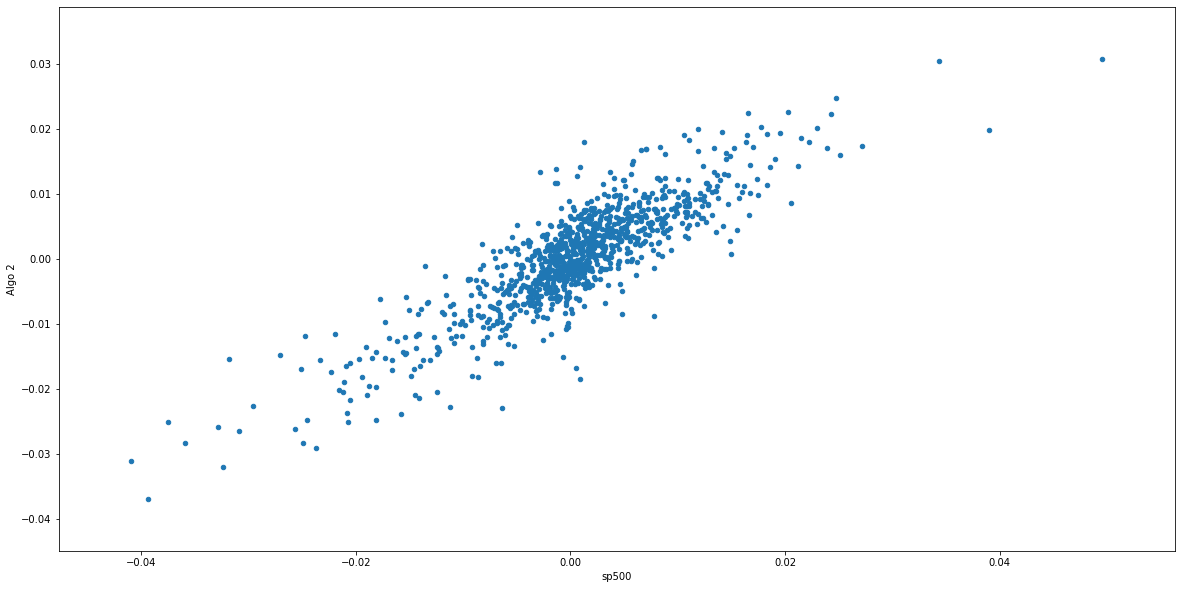

In [85]:
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

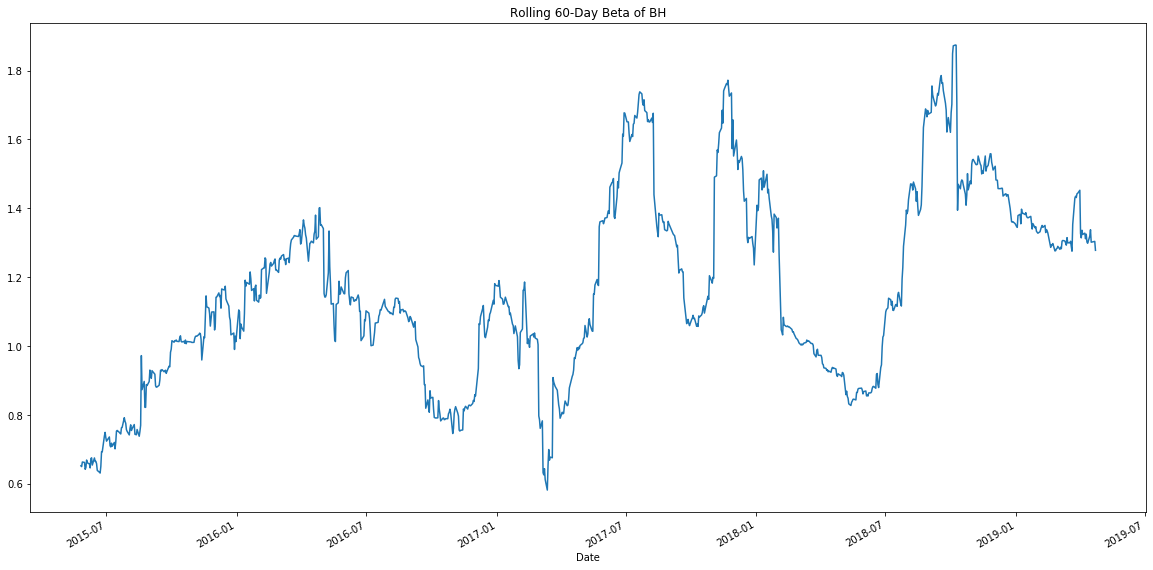

In [86]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

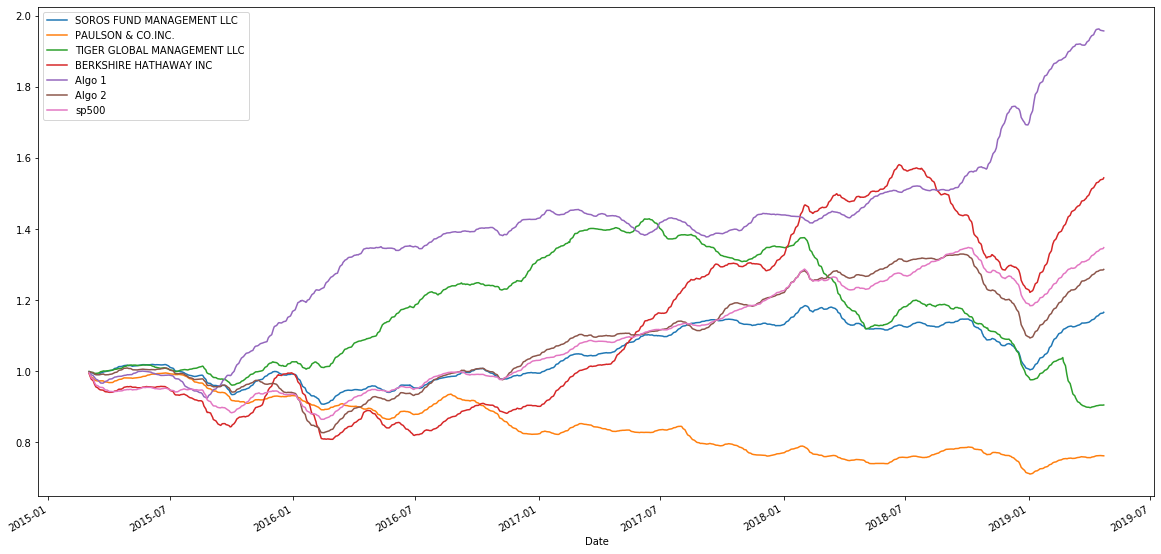

In [87]:
# Calculate a rolling window using the exponentially weighted moving average. 

df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

In [88]:
# Sharpe Ratio
# Calculate annualized Sharpe Ratios

sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

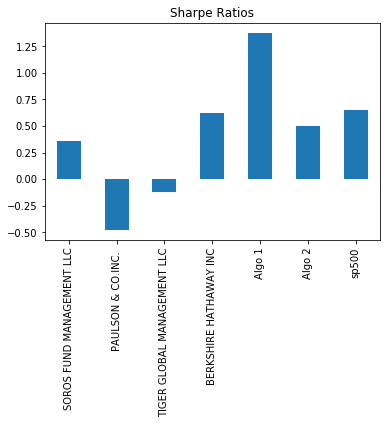

In [89]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

In [145]:
# Portfolio Returns
# Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
# Read the first stock

aapl_data_csv = Path("Resources/aapl_historical.csv")
aapl_data = pd.read_csv(aapl_data_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_data.sort_index(ascending = True, inplace = True)
aapl_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [146]:
# Read the second stock

cost_data_csv = Path("Resources/cost_historical.csv")
cost_data = pd.read_csv(cost_data_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_data.sort_index(ascending = True, inplace = True)
cost_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [147]:
# Read the third stock

goog_data_csv = Path("Resources/goog_historical.csv")
goog_data = pd.read_csv(goog_data_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_data.sort_index(ascending = True, inplace = True)
goog_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [183]:
# Concatenate all stocks into a single DataFrame

custom_stocks = pd.concat([aapl_data, goog_data, cost_data], axis = "columns", join = "inner")
custom_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [184]:
# Reset the index

custom_stocks.reset_index(inplace=True)

In [185]:
# Pivot so that each column of prices represents a unique symbol

pivot_main = pd.pivot_table(custom_stocks, index = ['Trade DATE'], values = ['NOCP'])
pivot_main.columns = ['AAPL', 'GOOG', 'COST']
pivot_main.head()

new_custom_stocks = pivot_main.reset_index()
new_custom_stocks.head()

,Trade DATE,AAPL,GOOG,COST
0,2018-05-11,188.59,1098.26,195.76
1,2018-05-14,188.15,1100.20,195.88
2,2018-05-15,186.44,1079.23,195.48
3,2018-05-16,188.18,1081.77,198.71
4,2018-05-17,186.99,1078.59,199.60


In [186]:
new_custom_stocks.index = new_custom_stocks['Trade DATE']
new_custom_stocks.drop(['Trade DATE'],axis =1, inplace=True)
new_custom_stocks.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [187]:
# Drop Nulls

new_custom_stocks.dropna(inplace=True)
new_custom_stocks.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [188]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]

my_portfolio = new_custom_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

In [190]:
# Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# Add your "Custom" portfolio to the larger dataframe of fund returns


portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [191]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [192]:
# Re-run the performance and risk analysis with your portfolio to see how it compares to the others
# Risk

portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.014413
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
sp500,0.009578


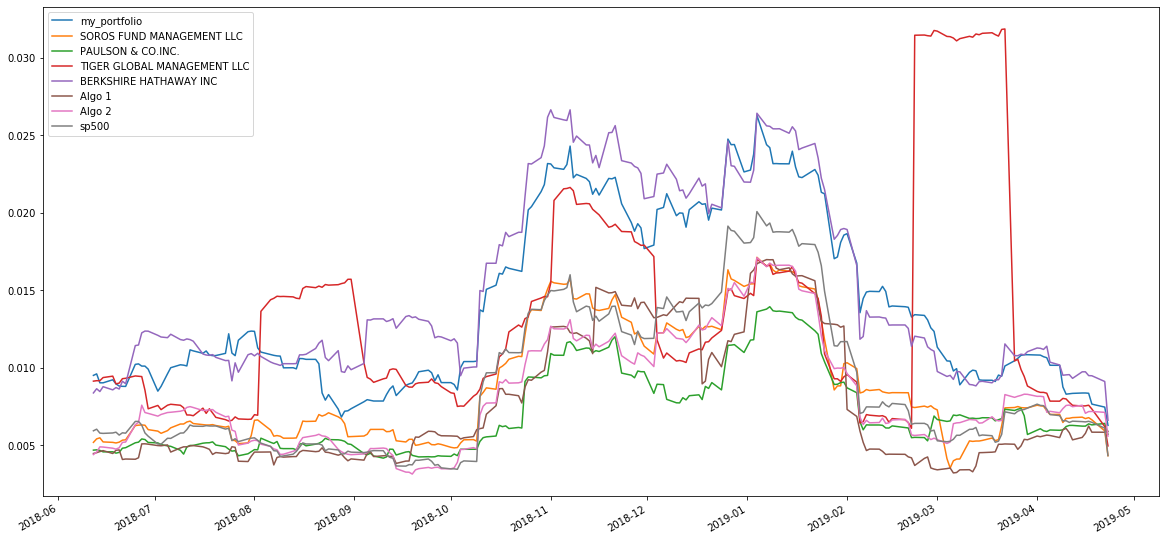

In [193]:
# Rolling

portfolio_returns.rolling(window=21).std().plot(figsize =(20,10) )

In [204]:
# Annualized Sharpe Ratios

sharpe_ratios = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))
sharpe_ratios

my_portfolio                   0.797793
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500                          0.584820
dtype: float64

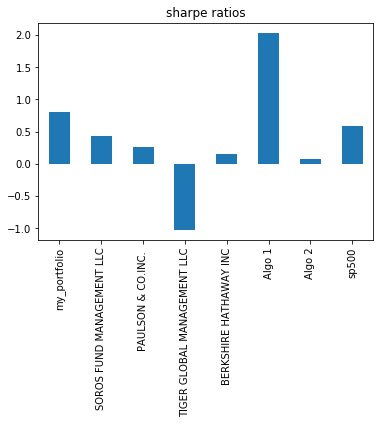

In [205]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [206]:
# Create a correlation analysis

portfolio_returns.corr()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
my_portfolio,1.000000,0.724218,0.606450,0.340536,0.841143,0.275728,0.725587,0.847217
SOROS FUND MANAGEMENT LLC,0.724218,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.606450,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.340536,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.841143,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.275728,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.725587,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
sp500,0.847217,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


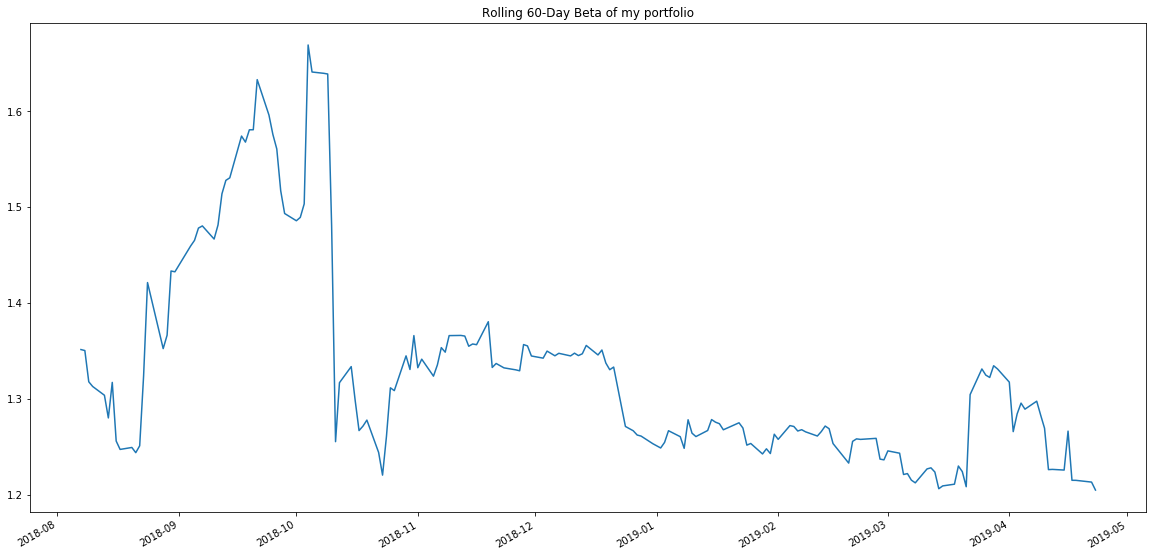

In [207]:
# Beta

rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')